In [ ]:
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
def AND(x1,x2):
  x=np.array([x1,x2])
  w = np.array([0.5,0.5])
  b= -0.7
  tmp = np.sum(w*x) + b
  if tmp<=0:
    return 0
  else:
    return 1

In [ ]:
print(AND(0,0))
print(AND(1,0))
print(AND(0,1))
print(AND(1,1))


0
0
0
1


In [ ]:
def step_function(x):
  y=x>0
  return y.astype(np.int)

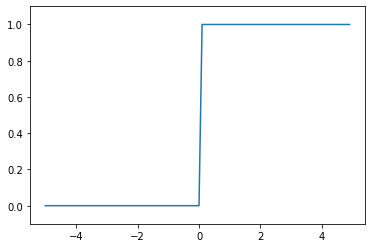

In [ ]:
x=np.arange(-5.0,5.0,0.1)
y=step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

한 층에서의 노드들은 각각의 역할이 있다.
ex) AND 게이트 OR 게이트

활성화 함수로 비선형이 아닌 선형 함수를 사용한다면 단층으로 표현이 가능해진다.

즉, AND AND AND 이렇게 있을 때 비선형이라면 첫번째 AND에서 이상한 값(선형적이지 않은 값)을 받고 넘기고... 를 반복해서 특이한 그래프모양을 갖을 수 있겠지만

선형이라면 AND 하나로 출력량만 조절해서 표현 할 수 있다.

=> 즉, 비선형이면 XOR을 만들 수 있지만 선형이라면 XOR을 만들 수 없다.

In [ ]:
A=np.array([[1,2],[3,4],[5,6]])
#B= np.array([[7],[8]])
B=np.array([7,8])
print(B.shape)
print(np.dot(A,B))


(2,)
[23 53 83]


In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))


In [ ]:
X = np.array([1.0,0.5])
W1 = np.array(([[0.1,0.3,0.5],[0.2,0.4,0.6]]))
B1 = np.array([0.1,0.2,0.3])
print(W1.shape)
print(X.shape)
print(B1.shape)
A1=np.dot(X,W1)+B1
print(A1)
Z1 = sigmoid(A1)

W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])

A2= np.dot(Z1,W2) + B2
Z2 = sigmoid(A2)

def identity_function(x):
  return x

W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])

A3 = np.dot(Z2,W3) + B3
Y = identity_function(A3)

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]


89 페이지 까지 봄

In [ ]:
def init_network():
  network = {}
  #2x3
  network["W1"] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
  #3
  network["b1"] = np.array([0.1,0.2,0.3])
  #3x2
  network["W2"] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
  #2
  network["b2"] = np.array([0.1,0.2])
  #2x2
  network["W3"] = np.array([[0.1,0.3],[0.2,0.4]])
  #2
  network["b3"] = np.array([0.1,0.2])

  return network


In [ ]:
def forward(network,x):
  W1, W2, W3 = network["W1"], network["W2"], network["W3"]
  b1, b2, b3 = network["b1"], network["b2"], network["b3"]

  a1 = np.dot(x,W1) + b1 # 3
  z1 = sigmoid(a1)

  a2 = np.dot(z1,W2) + b2 # 2
  z2 = sigmoid(a2)

  a3 = np.dot(z2,W3) + b3# 2
  y = identity_function(a3)

  return y

In [ ]:
network = init_network()
x = np.array([1.0,0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


In [ ]:
#def softmax(a):
#  c = np.max(a)
#  exp_a = np.exp(a-c)
#  sum_exp_a = np.sum(exp_a)
#  y = exp_a / sum_exp_a
#
#  return y

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

In [ ]:
softmax(np.array([0.3,2.9,4.0]))

array([0.01821127, 0.24519181, 0.73659691])

각 노드(뉴런)들은 자기만의 역할이 있다.

ex) MNIST에서 출력층의 0번 노드는 숫자 0을, 1번 노드는 숫자 1을... 판단하는 역할을 한다. 

또한 은닉층의 낮은 층, 예를 들어 은닉층 1층의 경우 이미지에서 특정 기울기에 반응, 판단하는 역할을 한다.

기계학습(머신러닝) : "사람이 특징을 추출" 후 학습

딥러닝 : 컴퓨터가 특징을 추출 후 학습

In [ ]:
arr = np.array([10,11,12,13,14,15,16,17,18,19])
arr[[3,7]]

array([13, 17])

In [ ]:
arr = np.array([[1,2,3],[4,5,6],[7,8,9]])

print(arr[[0,1,2],[0,1,2]])


[1 5 9]


활성화 함수로 계단 함수보다 시그모이드 함수를 사용하는 이유는 가중치 미세조정을 할 때 계단 함수는 조정에 따른 값의 전달이 없어져 버리기 때문이다.

In [ ]:
def function_2(x):
  return x[0]**2 + x[1]**2

In [ ]:
def numerical_gradient(f,x):
  h = 1e-4
  grad = np.zeros_like(x)

  for idx in range(x.size):
    temp_val = x[idx]
    x[idx] = temp_val + h
    fxh1 = f(x)

    x[idx] = temp_val - h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2*h)
    x[idx] = temp_val

  return grad

In [ ]:
print(numerical_gradient(function_2,np.array([3.0,4.0])))
print(numerical_gradient(function_2,np.array([0.0,2.0])))
print(numerical_gradient(function_2,np.array([3.0,0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


In [ ]:
def gradient_descent(f,init_x, lr=0.01, step_num = 100):
  x = init_x

  for i in range(step_num):
    grad = numerical_gradient(f,x)
    x -= lr*grad

  return x

In [ ]:
init_x = np.array([-3.0,4.0])

print(gradient_descent(function_2,init_x=init_x,lr=0.1,step_num = 100))

[-6.11110793e-10  8.14814391e-10]


In [ ]:
#import cupy as np

def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    if t.size == y.size:
      t = t.argmax(axis=1)

    batch_size = y.shape[0]
    #return -np.sum(t * np.log(y + 1e-7)) / batch_size
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

loss와 y와의 관계는 -log를 따르지만, 가중치 W와의 관계는 더욱 복잡하다.

In [ ]:
def numerical_gradient(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)
#
    it = nump.nditer(x.get(), flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)
#
        x[idx] = tmp_val - h
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
#
        x[idx] = tmp_val  # 값 복원
        it.iternext()
#
    return grad


In [ ]:
class simpleNet:
  def __init__(self):
    self.W = np.random.randn(2,3)
  
  def predict(self,x): # 출력층
    return np.dot(x, self.W)

  def loss(self, x, t):
    z = self.predict(x)
    y = softmax(z)
    loss = cross_entropy_error(y,t)

    return loss

In [ ]:
net = simpleNet()
print(net.W)

x = np.array([0.6,0.9])
p = net.predict(x)
print(p)
print(np.argmax(p))

t= np.array([0,0,1])

print(net.loss(x,t))

def f(blank):
  return net.loss(x,t)

dW = numerical_gradient(f,net.W)
print(dW)


[[ 1.58230199  0.39914185 -0.76265673]
 [ 1.25606977 -1.48807694 -1.05443914]]
[ 2.07984399 -1.09978413 -1.40658926]
0
3.5561561035079996
[[ 0.55959136  0.02327963 -0.58287099]
 [ 0.83938704  0.03491944 -0.87430648]]


위 코드 중 numerical_gradient 내부에서 f(x) 값을 구할 때 직접적으로 x 값이 쓰이지 않는다. 

따라서 x에 어떤 값이 와도 상관없다. 대신 net.W의 값이 바뀌면서 간접적으로 f(x)의 값이 변한다.

+ f(x)는 x(입력)의 변화가 아닌(=주어진 이미지는 바뀌지 않음) 가중치의 변화로 인한 생긴 출력값이다.

In [ ]:
test = np.array([[[1,2,3],
                  [2,1,4],
                  [5,2,1],
                  [6,3,2]],
                 [[5,1,3],
                  [1,3,4],
                  [4,2,6],
                  [3,9,3]],
                 [[4,5,6],
                  [7,4,3],
                  [2,1,5],
                  [4,3,1]]])

print(np.argmax(test,axis=1))

[[3 3 1]
 [0 3 2]
 [1 0 0]]


선형이냐 비선형이냐. => 다양한 모양(기능)을 만들기 위해서 (은닉층을 둔 이유)

 비선형이면 왜 계단함수가 아닌 시그모이드냐 => 미분을 통해 학습시키기 위해서, 가중치를 조금씩 변경시킬때마다 값이 조금씩 변하여 미세조정가능


In [ ]:
#import cupy as np

class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
    self.params = {}
    self.params["W1"] = weight_init_std * np.random.randn(input_size,hidden_size)
    self.params["b1"] = np.zeros(hidden_size)
    self.params["W2"] = weight_init_std * np.random.randn(hidden_size,output_size)
    self.params["b2"] = np.zeros(output_size)

  def predict(self, x):
    W1, W2 = self.params["W1"], self.params["W2"]
    b1, b2 = self.params["b1"], self.params["b2"]

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) +b2
    y = softmax(a2)

    return y

  def loss(self, x, t):
    y = self.predict(x)
    return cross_entropy_error(y, t)

  def accuracy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis= 1 )
    t = np.argmax(t, axis = 1)
    accuracy = np.sum(y==t)/float(x.shape[0])
    return accuracy

  def numerical_gradient(self,x,t):
    loss_W = lambda W: self.loss(x,t)

    grads={}

    grads["W1"] = numerical_gradient(loss_W, self.params["W1"])
    grads["b1"] = numerical_gradient(loss_W, self.params["b1"])
    grads["W2"] = numerical_gradient(loss_W, self.params["W2"])
    grads["b2"] = numerical_gradient(loss_W, self.params["b2"])
    return grads

In [ ]:
#net = TwoLayerNet(input_size=784, hidden_size = 100, output_size = 10)
#print(net.params["W1"].shape)
#print(net.params["b1"].shape)
#print(net.params["W2"].shape)
#print(net.params["b2"].shape)
#print(net.params["b2"])
#print(np.array([1,2,3,4,5,6,7,8,9]).reshape(1,3,3))
#x = np.random.rand(100,784)
#t = np.random.rand(100,10)
#
#grads = net.numerical_gradient(x,t)
#
#print(grads["W1"].shape)
#print(grads["b1"].shape)
#print(grads["W2"].shape)
#print(grads["b2"].shape)

In [ ]:
#x = np.random.rand(100,784)
#y= net.predict(x)
#print(y)

In [ ]:
from google.colab import files
src = list(files.upload().values())[0]
open('minist.py','wb').write(src)

Saving mnist.py to mnist.py


3783

In [ ]:
import cupy as np
import numpy as nump

from minist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label = True)

train_loss_list = []
train_acc_list=[]
test_acc_list = []

iter_per_epoch = 1#max(train_size / batch_size, 1)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
  batch_mask = np.random.choice(train_size,batch_size)
  x_batch = np.array(x_train[batch_mask.get()])
  t_batch = np.array(t_train[batch_mask.get()])
  grad = network.numerical_gradient(x_batch, t_batch)

  for key in ("W1","b1","W2","b2"):
    network.params[key] -= learning_rate * grad[key]

  loss = network.loss(x_batch,t_batch)
  train_loss_list.append(loss)

  if i % iter_per_epoch == 0:
    train_acc = network.accuracy(np.array(x_train), np.array(t_train))
    test_acc = network.accuracy(np.array(x_test), np.array(t_test))
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print(str(i)+" train acc, test acc : "+str(train_acc)+", "+str(test_acc))
    print("loss : ",loss)

In [ ]:
# 합본
#import cupy as cp
import numpy as np
from minist import load_mnist
from collections import OrderedDict

def sigmoid(x):
  return 1/(1+np.exp(-x))

def cross_entropy_error(y,t):
    if y.ndim == 1:
        y = y.reshape(1, y.size)
        t = t.reshape(1, t.size)

    if t.size == y.size:
      t = t.argmax(axis=1)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

def numerical_gradient(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)

        x[idx] = tmp_val  # 값 복원
        it.iternext()

    return grad

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

class Affine:
  def __init__(self, W, b):
    self.W = W
    self.b = b
    self.x = None
    self.dW = None
    self.db = None

  def forward(self, x):
    self.x = x
    out = np.dot(x, self.W) + self.b

    return out
  
  def backward(self, dout):
    dx = np.dot(dout, self.W.T)
    self.dW = np.dot(self.x.T, dout)
    self.db = np.sum(dout, axis = 0)

    return dx

class SoftmaxWithLoss:
  def __init__(self):
    self.loss = None
    self.y = None
    self.t = None

  def forward(self, x, t):
    self.t = t
    self.y = softmax(x)
    self.loss = cross_entropy_error(self.y, self.t)
    return self.loss

  def backward(self, dout=1):
    batch_size = self.t.shape[0]
    dx = (self.y-self.t) / batch_size

    return dx

class Relu:
  def __init__(self):
    self.mask = None

  def forward(self, x):
    self.mask = (x <= 0)
    out = x.copy()
    out[self.mask] = 0
    # 포워드에서만 고려하면된다. Why=> 역전파때 다시 쓰이기 때문
    # 따라서 카피해서 사용
    # 나의 입력(x)이 누군가의 출력(out)이고 해당 값을 저장하고 있을 수 있기 때문이다.
    # ex) sigmoid 는 역전파를 위해 out을 저장하고있는데 이를 Relu에 통과시킬때 카피해서 사용 안하면, 해당 값이 변경되기 때문에 역전파에 문제가 생긴다. 
    # 밑에 "forward 에서 copy를 하는 이유 !"에서 설명함

    #x[self.mask] = 0
    #out = x
    return out

  def backward(self, dout):
    dout[self.mask] = 0
    dx = dout

    return dx

class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
    self.params = {}
    self.params["W1"] = weight_init_std * np.random.randn(input_size,hidden_size)
    self.params["b1"] = np.zeros(hidden_size)
    self.params["W2"] = weight_init_std * np.random.randn(hidden_size,output_size)
    self.params["b2"] = np.zeros(output_size)

    self.layers = OrderedDict()
    self.layers["Affine1"] = Affine(self.params["W1"], self.params["b1"])
    self.layers["Relu1"] = Relu()
    self.layers["Affine2"] = Affine(self.params["W2"], self.params["b2"])

    self.lastLayer = SoftmaxWithLoss()

  def predict(self, x):
    #W1, W2 = self.params["W1"], self.params["W2"]
    #b1, b2 = self.params["b1"], self.params["b2"]

    #a1 = cp.dot(x, W1) + b1
    #z1 = sigmoid(a1)
    #a2 = cp.dot(z1,W2) + b2
    #y = softmax(a2)
    for layer in self.layers.values():
      x = layer.forward(x)

    return x
    #return y

  def loss(self, x, t):
    y = self.predict(x)
    #return cross_entropy_error(y, t)
    return self.lastLayer.forward(y, t)

  def accuracy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis= 1 )
    if t.ndim != 1 : t = np.argmax(t, axis = 1)
    accuracy = np.sum(y==t)/float(x.shape[0])
    return accuracy

  def numerical_gradient(self,x,t):
    loss_W = lambda W: self.loss(x,t)

    grads={}

    grads["W1"] = numerical_gradient(loss_W, self.params["W1"])
    grads["b1"] = numerical_gradient(loss_W, self.params["b1"])
    grads["W2"] = numerical_gradient(loss_W, self.params["W2"])
    grads["b2"] = numerical_gradient(loss_W, self.params["b2"])
    return grads

  def gradient(self, x, t):
    self.loss(x, t)

    dout = 1
    dout = self.lastLayer.backward(dout)

    layers = list(self.layers.values())
    layers.reverse()
    for layer in layers:
      dout = layer.backward(dout)

    grads={}
    grads["W1"] = self.layers["Affine1"].dW
    grads["b1"] = self.layers["Affine1"].db
    grads["W2"] = self.layers["Affine2"].dW
    grads["b2"] = self.layers["Affine2"].db

    return grads


(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label = True)

network = TwoLayerNet(input_size=784, hidden_size = 50, output_size = 10)
x_batch = x_train[:3]
t_batch = t_train[:3]

grad_backprop = network.gradient(x_batch, t_batch)
grad_numerical = network.numerical_gradient(x_batch, t_batch)

for key in grad_numerical.keys():
  diff = np.average(np.abs(grad_backprop[key] - grad_numerical[key]))
  print(np.abs(grad_backprop[key] - grad_numerical[key]).shape)
  print(key + ":" +str(diff))
#train_loss_list = []
#train_acc_list=[]
#test_acc_list = []
#
#iter_per_epoch = 1#max(train_size / batch_size, 1)
#
#iters_num = 10000
#train_size = x_train.shape[0]
#batch_size = 100
#learning_rate = 0.1
#
#network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
#
#for i in range(iters_num):
#  batch_mask = np.random.choice(train_size,batch_size)
#  x_batch = np.array(x_train[batch_mask])
#  t_batch = np.array(t_train[batch_mask])
#  grad = network.numerical_gradient(x_batch, t_batch)
#
#  for key in ("W1","b1","W2","b2"):
#    network.params[key] -= learning_rate * grad[key]
#
#  loss = network.loss(x_batch,t_batch)
#  train_loss_list.append(loss)
#
#  if i % iter_per_epoch == 0:
#    train_acc = network.accuracy(np.array(x_train), np.array(t_train))
#    test_acc = network.accuracy(np.array(x_test), np.array(t_test))
#    train_acc_list.append(train_acc)
#    test_acc_list.append(test_acc)
#    print(str(i)+" train acc, test acc : "+str(train_acc)+", "+str(test_acc))
#    print("loss : ",loss)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(784, 50)
W1:2.4749154535990024e-13
(50,)
b1:7.873227612399669e-13
(50, 10)
W2:8.673607011116559e-13
(10,)
b2:1.1990408943507446e-10


오차역전파 : 덧셈은 상류를 바로 하류로 보낸다. 곱셈은 상류의 값에다가 나를 제외한 다른 값들을 곱한다.(ex 2개일 경우 스위칭된다.)

p86의 그래프에서 노드와 노드 사이의 계산이 하나의 "계층"이다.

"계층"에서의 노드는 연산, 에지는 값이 흐른다.(ps p86그래프에서 노드는 값, 에지는 가중치 값)

ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

ReLu 장점 : 0보다 작은 부분들은 활성화가 안됨 => 특정 뉴런들만이 동작함 

왜 사용하는가? => 무슨 일(생각)을 할 때 "모든" 뉴련이 동작할 필요는 없음

In [ ]:
class Relu:
  def __init__(self):
    self.mask = None
  def forward(self,x):
    self.mask = (x<=0)

    x[self.mask] = 0
    out = x

    return out

  def backward(self,dout):
    dout[self.mask] = 0
    dx = dout

    return dx;

  #p167

In [ ]:
# forward 에서 copy를 하는 이유 !
import numpy as np
class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = sigmoid(x)
        out[0] = -77
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx
class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx

class Relu2:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
 
        x[self.mask] = 0
        out =x
        return out
    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx
x=np.random.randn(5)
print(x)
print("===========================================")

sig_1 = Sigmoid()
sig_2 = Sigmoid()
sig_3 = Sigmoid()
sig_4 = Sigmoid()


re_1 = Relu()
re_2 = Relu()

re2_1 = Relu2()
re2_2 = Relu2()


result1_1 = sig_1.forward(x)
print(sig_1.out)
print(result1_1)
result1_2 = re_1.forward(result1_1)
print(result1_2)
result1_3 = re_1.backward(result1_2)
print(result1_3)
result1_4 = sig_1.backward(result1_3)
print(result1_4)
print(sig_1.out)
print("===========================================")
result2_1 = sig_2.forward(x)
print(sig_2.out)
print(result2_1)
result2_2 = re2_1.forward(result2_1)
print(result2_2)
result2_3 = re2_1.backward(result2_2)
print(result2_3)
result2_4 = sig_2.backward(result2_3)
print(result2_4)
print(sig_2.out)
print("===========================================")
#print(x)
print(sig_1.out)
print(sig_1.backward(x))
#print(x)
print(sig_1.out - sig_2.out)
print(sig_2.out)
print(sig_2.backward(x))




[-0.40114532 -0.06897942 -0.74440744  0.9260605   0.52573732]
[-77.           0.48276198   0.32204111   0.71627536   0.62848836]
[-77.           0.48276198   0.32204111   0.71627536   0.62848836]
[0.         0.48276198 0.32204111 0.71627536 0.62848836]
[0.         0.48276198 0.32204111 0.71627536 0.62848836]
[-0.          0.12054704  0.07031144  0.14556504  0.14674621]
[-77.           0.48276198   0.32204111   0.71627536   0.62848836]
[-77.           0.48276198   0.32204111   0.71627536   0.62848836]
[-77.           0.48276198   0.32204111   0.71627536   0.62848836]
[0.         0.48276198 0.32204111 0.71627536 0.62848836]
[0.         0.48276198 0.32204111 0.71627536 0.62848836]
[0.         0.12054704 0.07031144 0.14556504 0.14674621]
[0.         0.48276198 0.32204111 0.71627536 0.62848836]
[-77.           0.48276198   0.32204111   0.71627536   0.62848836]
[ 2.40927880e+03 -1.72243576e-02 -1.62526947e-01  1.88198614e-01
  1.22754797e-01]
[-77.   0.   0.   0.   0.]
[0.         0.48276198

In [ ]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label = True)

network = TwoLayerNet(input_size=784, hidden_size = 50, output_size = 10)

train_loss_list = []
train_acc_list=[]
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

iters_num = 30000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
  batch_mask = np.random.choice(train_size,batch_size)
  x_batch = np.array(x_train[batch_mask])
  t_batch = np.array(t_train[batch_mask])
  grad = network.gradient(x_batch, t_batch)

  for key in ("W1","b1","W2","b2"):
    network.params[key] -= learning_rate * grad[key]

  loss = network.loss(x_batch,t_batch)
  train_loss_list.append(loss)

  if i % iter_per_epoch == 0:
    train_acc = network.accuracy(np.array(x_train), np.array(t_train))
    test_acc = network.accuracy(np.array(x_test), np.array(t_test))
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print(str(i)+" train acc, test acc : "+str(train_acc)+", "+str(test_acc))
    print("loss : ",loss)

0 train acc, test acc : 0.13928333333333334, 0.144
loss :  2.3008955585807347
600 train acc, test acc : 0.90285, 0.9074
loss :  0.26312452226471594
1200 train acc, test acc : 0.9220666666666667, 0.9251
loss :  0.17343815007035446
1800 train acc, test acc : 0.9356333333333333, 0.9329
loss :  0.24708421427938063
2400 train acc, test acc : 0.9449666666666666, 0.9428
loss :  0.24003391406504676
3000 train acc, test acc : 0.9529666666666666, 0.9509
loss :  0.11287139860197275
3600 train acc, test acc : 0.9560166666666666, 0.9524
loss :  0.15652048099236385
4200 train acc, test acc : 0.9633, 0.9598
loss :  0.08029930160427781
4800 train acc, test acc : 0.96645, 0.9613
loss :  0.11822997397710162
5400 train acc, test acc : 0.9676833333333333, 0.9625
loss :  0.08835182732365561
6000 train acc, test acc : 0.9719166666666667, 0.9663
loss :  0.057117778321073905
6600 train acc, test acc : 0.9733166666666667, 0.9659
loss :  0.07893803972628005
7200 train acc, test acc : 0.9748666666666667, 0.9686


In [ ]:
np.random.randn(2,10) *1

array([[-0.56569847,  0.85512665,  0.78766226, -0.80050378, -0.14906627,
        -1.30568827,  0.05759241, -1.86100452, -0.98789379,  1.983349  ],
       [-0.59076857,  0.57793377, -0.94554218,  1.45748826, -1.33054863,
        -1.13570648,  1.1455276 , -0.34992864, -1.59036835,  0.71020415]])